# Eric Schmidt

## Assignment 8

### DATA 612: Data Mining

### Dr. AbdelRahman

I chose the `House Prices - Advanced Regression Techniques` from www.kaggle.com to work with for my final project. The goal of this project is to predict the price of a house based on several predictor variables. As with all data science projects, it's best to have some domain knowledge for best results. Although I am not a real estate expert, I am familiar with the nuances that affect housing prices as a consumer in the United States real estate market.

The following notebook is the beginning stages of exploratory data analysis to get an understanding of the type of data I'll be working with.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
train = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/buckioh1/Franklin/main/Final%20Project/test.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Sale Price by Neighborhood

To begin, I'd like to explore relationships that affect Sale Price based on my domain knowledge of real estate. The first predictor I believe makes the most impact is the Neighborhood the house is in. I'd like to see if there's a relationship between the `Neighborhood` and the `SalePrice`.

In [89]:
# train[['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).mean().sort_values(by = 'SalePrice', ascending = False).style.format({'SalePrice': '${:,.2f}'})
train[['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).describe().sort_values(by = ('SalePrice', 'mean'), ascending = False).head(5).style.format({('SalePrice', 'mean'): '${:,.2f}'})

In [90]:
train.assign(index = train.groupby('Neighborhood').cumcount()).pivot('index', 'Neighborhood', 'SalePrice').head(5)

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
index,,,,,,,,,,,,,,,,,,,,,
0,167240.0,151000.0,112000.0,118000.0,225000.0,208500.0,140000.0,82000.0,177000.0,139400.0,...,250000.0,345000.0,129900.0,179500.0,129500.0,159000.0,307000.0,438780.0,170000.0,181500.0
1,192500.0,124000.0,106000.0,132000.0,180000.0,223500.0,163500.0,94750.0,185000.0,40000.0,...,260000.0,325300.0,113000.0,135900.0,144000.0,144000.0,249700.0,239000.0,220000.0,385000.0
2,192000.0,NaN,94500.0,68500.0,235000.0,279500.0,217000.0,83000.0,168500.0,110000.0,...,290000.0,256300.0,140000.0,140000.0,90000.0,158000.0,172500.0,501837.0,269500.0,162500.0
3,172500.0,NaN,89500.0,114500.0,190000.0,230000.0,259500.0,136900.0,174000.0,101000.0,...,403000.0,306000.0,80000.0,127000.0,154000.0,178000.0,245000.0,286000.0,228000.0,324000.0
4,178740.0,NaN,118000.0,127000.0,211000.0,179900.0,200100.0,155000.0,185000.0,85000.0,...,290000.0,277500.0,107400.0,115000.0,149350.0,118964.0,164500.0,377426.0,184000.0,245500.0


In [84]:
neighborhood_df = train.assign(index = train.groupby('Neighborhood').cumcount()).pivot('index', 'Neighborhood', 'SalePrice')
median_price = neighborhood_df.dropna().median()
median_price.sort_values(ascending = False, inplace = True)
neighborhood_df = neighborhood_df[median_price.index]
labels = neighborhood_df.columns

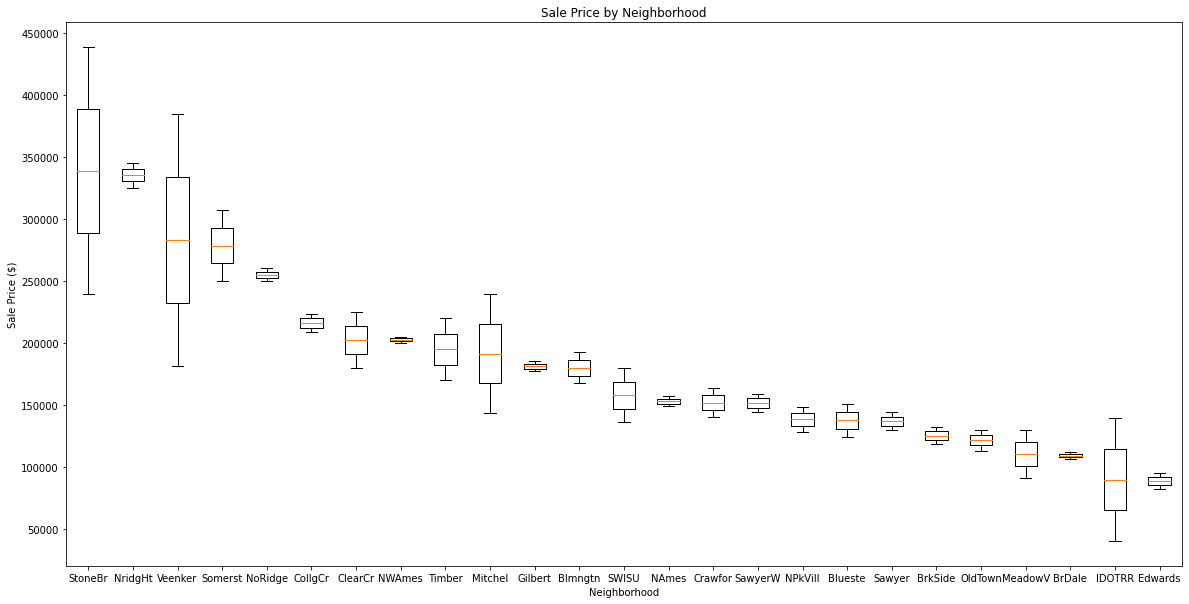

In [86]:
fig, ax = plt.subplots(figsize = (20, 10))

plt.boxplot(neighborhood_df.dropna().values)
plt.xticks(range(1, 26), labels)
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')
plt.title('Sale Price by Neighborhood')

plt.show()

The preceding code confirms there is a relationship between the `Neighborhood` and the `SalePrice`. There are some neighborhoods that have a larger distribution than others, but this should be a reliable predictor in home sale price.